# Rompiendo RSA con algoritmo de Shor

In [ ]:
pip install git+https://github.com/MIROptics/ECC2025.git

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Complejidad Computacional

La complejidad computacional se refiere a la cantidad de recursos necesarios para resolver un problema computacional, ya sea en tiempo (por la cantidad de operaciones matematicas que hay que realizar) o espacio (memoria), dependiendo del tamaño de la entrada del problema.

Cuando decimos que un algoritmo es "exponencialmente lento" o que "corre en tiempo polinomial", estamos describiendo su complejidad en términos de la relación entre el tamaño de la entrada y el tiempo que necesita para resolver el problema:

* Algoritmo de tiempo exponencial: El tiempo de ejecución de estos algoritmos aumenta exponencialmente con el tamaño de la entrada. Por ejemplo, con un tiempo de ejecución de $O(2^n)$, donde $n$ es el tamaño de la entrada, incluso un pequeño aumento en $n$ puede llevar a un aumento significativo en el tiempo necesario para completar el algoritmo. Son prácticos solo para problemas de tamaño pequeño.

* Algoritmo de tiempo polinomial: Estos algoritmos son más eficientes, con un tiempo de ejecución que aumenta como una potencia del tamaño $n$ de la entrada.


**Consideremos el siguiente ejemplo:**

Para una entrada de $n=100$, un par algoritmos con un tiempo de ejecución polinomial, como $O(n^2)$ o $O(n^3)$, podrían ser completados teniendo que realizar alrededor de $10.000$ o $1.000.000$ operaciones, respectivamente, mientras que un algoritmo de tiempo exponencial, como $O(2^n)$, resulta intratable al requerir realizar el orden de $1.000.000.000.000.000.000.000.000.000.000$ operaciones.

A continuación vemos un gráfico de como crece la complejidad en función del tamaño del dato de entrada para $4$ casos distintos: (i) complejidad lineal, (ii) logarítmica, (iii) polinomial y (iv) exponencial.

In [ ]:
n = np.arange(1, 9)
plt.plot(n, n, label = "lineal, $n$")
plt.plot(n, np.log2(n), label = "logaritmica, $\log_{2}(n)$")
plt.plot(n, n**2, label = "polinomial, $n^2$")
plt.plot(n, 2**n, label = "exponencial, $2^n$")

plt.xlabel("n")
plt.ylabel("Complejidad")
plt.legend(loc='best')

### Factorización

Recordando de la clase de la mañana, para poder factorizar un número $N$ en dos factores $p$ y $q$ ($N=pq$) primos (o coprimos) necesitamos implementar las siguientes rutinas:

- Operación módulo entre dos números
- Máximo comun divisor
- Encontrar el periódo de la exponenciación modular

La operación módulo y encontrar el máximo común divisor se pueden hacer eficientemente en un computador clásico, por lo que **la dificultad computacional radica en encontrar el periódo $r$ de la función**

$$f(x) = a^{x}\mod N$$

O lo que es equivalente, encontrar el $r$ tal que se cumpla

$$(a^{r}-1)\mod N\equiv 0\mod N .$$

### Operación módulo

La operación módulo se calcula como el resto de la division entre dos números. Puede ser implementada como

In [ ]:
def mi_modulo(a, b):
    division = a / b
    parte_decimal = division - int(division)
    resto = parte_decimal * b

    return int(resto)

# Ejemplo
mi_modulo(48, 32)

aunque es importante notar que esta operación se encuentra muy eficientemente implementada en la mayor parte de los lenguajes de programación, y tiene complejidad $O(1)$ (constante; su dificultad no crece con el tamaño de los números involucrados).

En muchos lenguajes de programación, incluído python, se denota $\mathrm{modulo}(a, b)$ como `a % b`.

In [ ]:
48 % 32 # Operación módulo

### Maximo comun divisor

Usamos el metodo de Euclides para encontrar el máximo común divisor (mcd) entre dos números. Este algoritmo tiene complejidad $O(\log(\min(a, b)))$

In [ ]:
def mcd(a, b):
    while b:
        a, b = b, a%b
    return a

In [ ]:
mcd(48, 18)

### Encontrando el periodo (forma clásica)

Para números pequeños podemos encontrar el periódo por inspección visual

In [ ]:
a = 8     # Aleatorio, 1 < a < N-2
N = 15    # Numero a factorizar

# Función periódica
f = lambda x: (a**x) % N

# Graficamos f(x)
x = np.arange(N)
plt.plot(x, f(x))
plt.xticks(x);

El problema es que para números grandes, encontrar el periódo de la función modular es un problema computacional que crece con la entrada superpolinomialmente (requiere mucho más tiempo que un problema polinomial) en el mejor de los casos o exponencialmente en el peor de los casos.

Recordemos que si el periodo es $r$. significa que
$$ a^{r}\mod N \equiv 1 \mod N$$
o, equivalentemente,
\begin{array}{rl}
&(a^{r}-1)\mod N\equiv 0\mod N \\
\\
\Longleftrightarrow &(a^\frac{r}{2} + 1)(a^\frac{r}{2} - 1)= kN, \quad k\in\mathbb{N}.
\end{array}
de modo que si definimos
\begin{align}
p &:= a^\frac{r}{2} + 1 = p_1 p_2 ... p_M\\
q &:= a^\frac{r}{2} - 1 = q_1 q_2 ... q_L\\
\end{align}
se puede agrupar
$$ pq = p_1 p_2 ... p_M q_1 q_2 ... q_L = kN$$
y podemos ver que
\begin{align}
N = \mathrm{mcd}(p, N)\text{ }\mathrm{mcd}(q, N)
\end{align}
de forma que teniendo el periodo $r$ podemos computar los factores de $N$ de esta manera.

**Ejercicio 1**: Volviendo al caso de los números $a=8$ y $N=15$, encuentra los factores de $N$.

Ahora, como mencionamos antes, para números más grandes necesitamos tener una función para poder encontrar el periodo de la exponenciación modular $$f(x) = a^{x}\mod N$$

Una de las formas posibles de encontrar el periodo de manera clásica es a "fuerza bruta".

**Ejercicio 2**: Escriba una función "find_period" que dado un número $N$ y un número $a$, encuentre y entregue $r$ tal que $a^{r}\equiv 1\mod N$.

In [ ]:

def find_period(N, a):


find_period(N, a)

Evidentemente esta no es la forma más optima de calcular el periodo de manera clásica. Como ya sabemos, por el teorema de Euler, sabemos que $a^{\varphi(N)}\equiv 1\mod N$, aunque esto no nos dice  que $\varphi(N)$ es el periodo, nos asegura que el periodo divide a $\varphi(N)$, por lo que muchos de los métodos más optimos para encontrar el periodo se basan en calcular $\varphi(N)$.

Con todo lo anterior, podemos implementar un algoritmo de Shor "clásico".

**Ejercicio 3**: Escriba una función que permita implementar un algoritmo de Shor "clásico". que dados $N$ y $a$, devuelva los factores.

In [ ]:
def _shor_clasico(N, a):


    return factores

In [ ]:
_shor_clasico(N, a)

Pero recordemos que el algoritmo de Shor nos pedía que el $\mathrm{MCD}(a,N)=1$, por lo que debemos considerar los casos en los que sea mayor que $1$:

In [ ]:
# Una implementación mas completa, que se encarga de verificar los casos especiales
def shor_clasico(N):
    # Elegimos a al azar
    a = np.random.randint(2, N-1)

    # Si el MCD es 1, entonces podemos usar a para buscar el periodo de f(x)
    f1 = mcd(a, N)

    # Si el MCD es mayor que 1, entonces ya encontramos un factor
    if f1 > 1:
        return [f1, N//f1]

    # Usamos la implementación para N y a dados
    return _shor_clasico(N, a)

In [ ]:
factores = shor_clasico(427335)
factores

In [ ]:
np.prod(factores)

Sin embargo, la busqueda del periodo de $f(x)$ es exponencialmente costosa, volviéndola una tarea imposible para numeros grandes. Por este motivo, recurriremos a la Computación Cuántica, que nos ofrece un algoritmo mucho mas eficiente para resolver la busqueda del periodo: el algoritmo de **Quantum Phase Estimation (QPE)**.

Una parte importante del algoritmo de QPE es la transformada cuántica de Fourier, por lo que comenzaremos haciendo una introducción a esta.

### Transformada Cuántica de Fourier (QFT)

La transformada de Fourier es una transformación matemática que, al ser aplicada sobre una función, la descompone en funciones periódicas, indicandonos las frecuencias que construyen a esta función. En el mundo moderno, es una herramiénta matemática crucial para todo lo que involucre análisis de señales, desde el procesamiento y manejo de audio, como la música, hasta prácticamente todas las áreas de la ingeniería.

La transformada de Fourier se implementa clásicamente mediante la transformada de Fourier discreta (DFT), teniendo una complejidad $O(m\mathrm{log}(m))$, donde $m$ es el tamaño de la señal de entrada, mediante el algoritmo clásico más rápido, que es la Fast Fourier Transform (FFT).

Así como podemos realizar la FFT para encontrar la transformada de Fourier de una función codificada en un sistema clásico, también podemos tener la función codificada en un sistema cuántico con $n$ qubits, y encontrar su transformada de Fourier utilizando la Transformada Cuántica de Fourier (QFT), que en su mejor implementación requiere $O(n\mathrm{log}(n))$ compuertas: [Hales and Halgreen, (2000)](https://doi.org/10.1109/SFCS.2000.892139).

Debemos recordar que se requieren $m=2^n$ bits clásicos para emular $n$ qubits, de modo que para emular la QFT, la FFT tendría una complejidad de $O(n2^n)$, dejando en claro que la QFT resulta exponencialmente mas eficiente que la mejor transformada de Fourier clásica.

### Estimación Cuántica de Fase (QPE)

La Estimación Cuántica de Fase es un algoritmo de gran relevancia en la computación cuántica, siendo un ingrediente fundamental en aplicaciones como el algoritmo de Shor.

La QPE resuelve el **problema de estimación de fase**: Si $|\psi\rangle$ es un autovector de un operador unitario $U$, entonces necesariamente $U|\psi\rangle = e^{2\pi i\theta}|\psi\rangle$. El problema de estimación de fase consiste en estimar el valor de la fase, $\theta$, dentro del rango $[0, 1[$.

Para resolver este problema, la QPE hace uso del operador unitario $U$ y la QFT para encontrar $\theta$, lo que nos resulta de utilidad puesto que si codificamos nuestra función de exponenciacion modular, $f(x)$, como el operador $U$, entonces la QPE nos permite encontrar eficientemente el periodo de $f(x)$.

### Implementación de la QPE a través de una simulación

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

Definimos la exponenciación modular y la compuerta $a \ \mathrm{mod} \ N$ controlada

In [ ]:
def modular_exponentiation(qc, Nq, a, N):
    for x in range(Nq):
        qc.append(controlled_amod(a, 2**x, N),
                  [x] + list(range(Nq, 2*Nq)))

# Esta implemetacion es especifica para N=15.
# Puede ser generalizada pero escapa al alcance del taller
def controlled_amod(a, x, N=15):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)
    for _ in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{x} mod {N}"
    c_U = U.control()
    return c_U

**Ejercicio 4**: Definir el número de qubits necesarios, los registros clásicos y el circuito cuántico

In [ ]:
def _shor_circuit(N, a):
    # Numero de qubits para codificar N
    Nq =

    # Define un circuito cuantico
    qc =


    # Incorpora las compuertas de exponenciacion modular
    modular_exponentiation(qc, Nq, a, 15)

    # Transformada Cuántica de Fourier Inversa
    iQFT = QFT(Nq, do_swaps=True).inverse()
    qc.append(iQFT, range(Nq))
    # Medimos los resultados
    qc.measure(range(Nq), range(Nq))


    return qc

Vemos como se ve el circuito con $N=15$ y $a=7$:

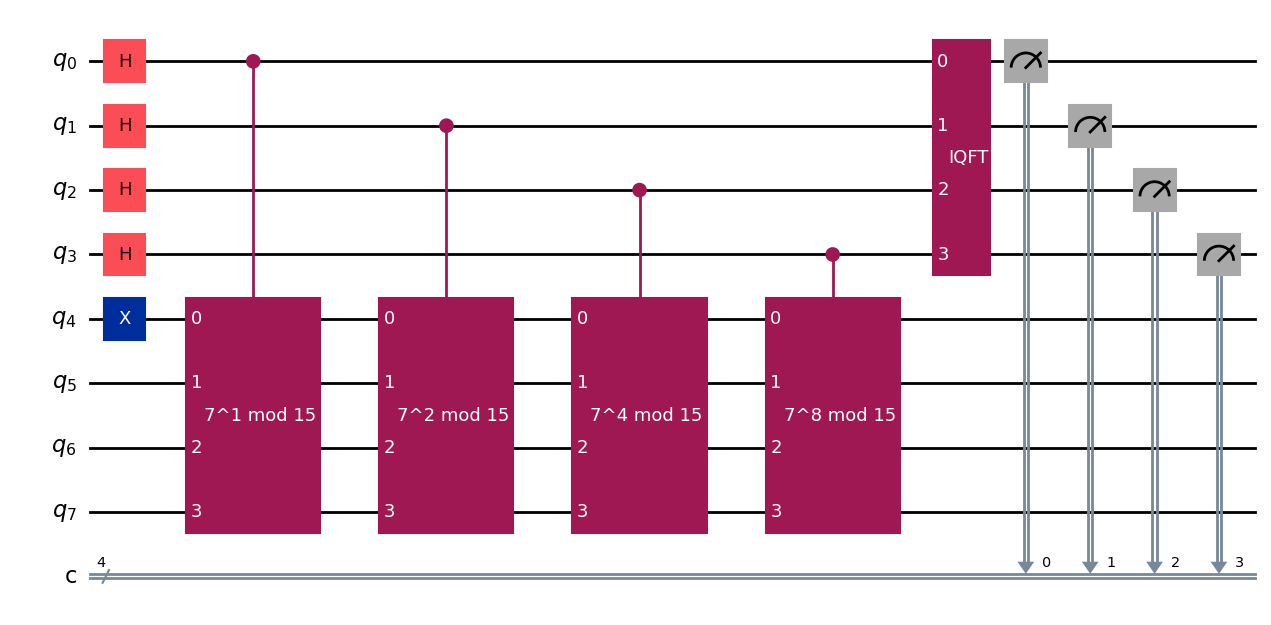

In [ ]:
N = 15
a = 7
_shor_circuit(N, a).draw('mpl')

**Ejercicio 5**: Llamar al simulador, crear el resultado de experimento y plotear el histograma.

Graficamos el histograma de las cuentas de cada resultado

Convertimos las etiquetas de los estados que obtuvimos, de binario a decimal:

In [ ]:
results_dec = np.sort([int(binstate, 2) for binstate in counts.keys()])
results_dec

In [ ]:
from fractions import Fraction

def _shor(N, a, shots=1):
    # Definimos y corremos el circuito cuántico
    qc = _shor_circuit(N, a)
    simulator = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(qc, simulator)

    result = simulator.run(transpiled_circuit, shots=shots).result()
    counts = result.get_counts()

    # Obtenemos los nombres en decimal de los estados obtenidos
    results_dec = np.sort([int(binstate, 2) for binstate in counts.keys()])

    # Numero total de estados
    total_num_states = 2**int(np.ceil(np.log2(N)))
    # Fases normalizadas, j/r
    phases = [res/total_num_states for res in results_dec if res != 0]

    # Usamos fracciones continuadas para obtener el denominador de j/r
    r_array = [Fraction(phase).limit_denominator(N).denominator
               for phase in phases ]

    # Para cada r, encontramos los factores
    factors = []
    for r in r_array:
        # Si r es impar, saltamos la iteracion
        if  r != int(r/2)*2:
            continue
        # Si r es par, calculamos los factores
        x = a ** (r//2)
        factors.append([mcd(x-1, N), mcd(x+1, N)])

    return factors


In [ ]:
# Simulamos el algoritmo de Shor cuántico
_shor(N, a, shots=1)

En caso de que j y r tengan factores en común, podemos tener que correr el circuito de nuevo. Por eso, podemos correr con varios shots, y vemos que encontramos 3 soluciones, de las cuales 2 son correctas.

In [ ]:
_shor(N, a, shots=100)

Hemos factorizado 15 como 3 $\times$ 5

### Implementación para N genérico

Dada la complejidad de la exponenciación modular, el codigo arriba se ha dejado para un valor fijo de $N = 15$. Por completitud, dejamos a su disposición un archivo llamado `taller_2_shor_generico.py` del cual pueden importar el circuito de Shor para factorizar números distintos de $N$.

In [ ]:
from taller_2_shor_generico import shor_circuit

qc = shor_circuit(N=15, a=7)
qc.draw()

In [ ]:
def find_period_generico(N: int, a: int) -> int:
    qc = shor_circuit(N, a)
    simulator = Aer.get_backend('aer_simulator')
    circuit = transpile(qc, simulator)
    result = simulator.run(circuit, shots=1).result()
    counts = result.get_counts()

    # Obtenemos los nombres en decimal de los estados obtenidos
    results_dec = np.sort([int(binstate, 2) for binstate in counts.keys()])

    # Numero total de estados
    total_num_states = 2 ** N.bit_length()

    # Fases normalizadas, j/r
    phase = results_dec[0]/total_num_states

    # Usamos fracciones continuadas para obtener el denominador de j/r
    r = Fraction(phase).limit_denominator(N).denominator

    return r

In [ ]:
import random
import math

def shor_generico(N: int) -> list[int]:
    a = random.randint(2, N-2)

    # Ensure a and N are coprimes
    f1 = math.gcd(a, N)
    if f1 > 1:
        return [f1, N//f1]

    # Here is where the magic happens!
    r = find_period_generico(N, a)

    if r%2 == 1: # r is odd
        return shor_generico(N)
    else:        # r is even
        x = pow(a, r//2, N)

        if x == N-1:
            return shor_generico(N)

        p = math.gcd(x - 1, N)
        q = math.gcd(x + 1, N)

        # At least one is a nontrivial factor
        if p == 1:
            p = N // q
        if q == 1:
            q = N // p

        return [p, q]

In [ ]:
# Primes until 20:
# 2, 3, 5, 7, 11, 13, 17, 19

N = 11 * 5

shor_generico(N)

## Contactos:

Daniel Concha <br>
Estudiante Doctorado en ciencias físicas <br>
Universidad de Concepción <br>
dconcham@udec.cl

Jorge Gidi <br>
Estudiante doctorado en ciencias físicas <br>
Universidad de Concepción <br>
jorgegidi@udec.cl

María Barría <br>
Estudiante doctorado en ciencias físicas <br>
Universidad de Concepción <br>
marbarria@udec.cl